In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) # to view all the column details without truncation

In [3]:
# SWM Project connection string for SQL Server
connection_string = 'DRIVER={SQL Server};SERVER=192.168.0.100;DATABASE=MFB_LIVE;UID=sa;PWD=scs@123'
connection = pyodbc.connect(connection_string)

# SWM SQL query to select all records from the required table
query = "SELECT * FROM DP_MFB_BASE WHERE R_NO = 1"

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)
df # Top 5 and bottom 5 rows and columns details

,NUM_1,UNID,UNIT_STATUS,ACTION_CODE,LATITUDE,LONGITUDE,STATION,TYCOD,SUB_TYCOD,PRIM_UNIT,ALARM_LEV,CD_TS_CLEAN_DISP,CD_TS_CLEAN,DS_TS_CLEAN,EN_TS_CLEAN,AR_TS_CLEAN,RANGE,R_NO,VEHICLE_TYPE,RESP_TIME_IN_MINS,ACKNOWLEDGE_TIME_IN_MINS,LEAVE_TIME_IN_MINS,TRAVEL_TIME_IN_MINS,INCI_COMBINED,HOUR_INCI_BIN,MNTH,YR,MNTH_NAME,MNTH_YR,DAY_OF_WEEK,CLEAN_DATE
0,F202301231,MP61,Dispatch,29,19.247632,72.862479,DAHISAR,RESCUE_SERVICE,BIRD_RESCUE,MP61,1,2023-01-20 13:55:53,2023-01-20 13:56:05,2023-01-20 13:56:05,2023-01-20 13:58:02,2023-01-20 14:03:59,REGION-4,1,MP,8.10,0.20,1.95,5.95,F202301231MP61,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
1,F202301242,BK23,Dispatch,29,18.934805,72.834626,FORT,RESCUE_SERVICE,BIRD_RESCUE,BK23,1,2023-01-20 16:42:34,2023-01-20 16:42:49,2023-01-20 16:42:49,2023-01-20 16:50:01,2023-01-20 17:02:17,REGION-1,1,BK,19.72,0.25,7.20,12.27,F202301242BK23,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
2,F202301364,MP39,Dispatch,29,19.230020,72.840612,BORIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP39,1,2023-01-22 07:58:19,2023-01-22 08:05:11,2023-01-22 08:05:11,2023-01-22 08:05:46,2023-01-22 08:16:01,REGION-4,1,MP,17.70,6.87,0.58,10.25,F202301364MP39,MORNING,1,2023,January,Jan_2023,Sunday,2023-01-22
3,F202300310,BK11,Dispatch,29,19.261711,72.851505,KANDARPADA,FIRE_CALL,FIRE_CALL,BK11,1,2023-01-08 13:45:10,2023-01-08 13:45:26,NaT,NaT,NaT,REGION-4,1,BK,0.00,0.00,0.00,0.00,F202300310BK11,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
4,F202300321,MP36,Dispatch,29,19.197250,72.871520,DINDOSHI,RESCUE_SERVICE,BIRD_RESCUE,MP36,1,2023-01-08 16:40:36,2023-01-08 16:40:48,NaT,NaT,NaT,REGION-4,1,MP,0.00,0.00,0.00,0.00,F202300321MP36,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,F202312679,MP43,Dispatch,29,19.070771,72.868015,BKC,FIRE_CALL,FIRE_CALL,MP43,1,2023-09-08 16:56:47,2023-09-08 16:57:44,2023-09-08 16:57:44,2023-09-08 17:00:23,2023-09-08 17:36:08,REGION-3,1,MP,39.35,0.95,2.65,35.75,F202312679MP43,AFTERNOON,9,2023,September,Sep_2023,Friday,2023-09-08
15984,F202312726,MP34,Dispatch,29,18.961477,72.812637,GAWALATANK,RESCUE_SERVICE,ANIMAL_RESCUE,MP34,1,2023-09-10 09:42:16,2023-09-10 09:43:39,2023-09-10 09:43:39,2023-09-10 10:20:56,2023-09-10 10:21:02,REGION-1,1,MP,38.77,1.38,37.28,0.10,F202312726MP34,MORNING,9,2023,September,Sep_2023,Sunday,2023-09-10
15985,F202312887,MP38,Dispatch,29,19.201187,72.858109,KANDIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP38,1,2023-09-16 17:45:32,2023-09-16 18:35:48,2023-09-16 18:35:48,2023-09-16 18:36:28,2023-09-16 19:43:49,REGION-4,1,MP,118.28,50.27,0.67,67.35,F202312887MP38,EVENING,9,2023,September,Sep_2023,Saturday,2023-09-16
15986,F202312981,MP59,Dispatch,29,18.957974,72.832664,MEMONWADA,HOUSE_COLLAPSE,HOUSE_COLLAPSE,MP59,1,2023-09-19 12:44:34,2023-09-19 12:45:08,2023-09-19 12:45:08,2023-09-19 12:48:52,2023-09-19 13:01:37,REGION-1,1,MP,17.05,0.57,3.73,12.75,F202312981MP59,AFTERNOON,9,2023,September,Sep_2023,Tuesday,2023-09-19


In [4]:
data = df[['NUM_1', 'CLEAN_DATE']].copy()
data

,NUM_1,CLEAN_DATE
0,F202301231,2023-01-20
1,F202301242,2023-01-20
2,F202301364,2023-01-22
3,F202300310,2023-01-08
4,F202300321,2023-01-08
...,...,...
15983,F202312679,2023-09-08
15984,F202312726,2023-09-10
15985,F202312887,2023-09-16
15986,F202312981,2023-09-19


In [5]:
# Group by 'CLEAN_DATE' and count occurrences of 'NUM_1'
df_grouped = data.groupby('CLEAN_DATE', as_index=False)['NUM_1'].count()

# Rename the count column to 'NUM_1_Count'
df_grouped.rename(columns={'NUM_1': 'NUM_1_Count'}, inplace=True)

# Print or display the resulting DataFrame
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [6]:
dropped_df = df_grouped.drop(index=pd.concat([df_grouped.head(), df_grouped.tail()]).index)

print("Original DataFrame:")
print(df_grouped)

print("\nDataFrame after dropping head and tail values:")
print(dropped_df)

Original DataFrame:
     CLEAN_DATE  NUM_1_Count
0    2022-11-30           25
1    2022-12-01           29
2    2022-12-02           37
3    2022-12-03           42
4    2022-12-04           28
..          ...          ...
382  2023-12-17           27
383  2023-12-18           35
384  2023-12-19           30
385  2023-12-20           30
386  2023-12-21            4

[387 rows x 2 columns]

DataFrame after dropping head and tail values:
     CLEAN_DATE  NUM_1_Count
5    2022-12-05           32
6    2022-12-06           35
7    2022-12-07           31
8    2022-12-08           23
9    2022-12-09           32
..          ...          ...
377  2023-12-12           23
378  2023-12-13           35
379  2023-12-14           38
380  2023-12-15           25
381  2023-12-16           33

[377 rows x 2 columns]


In [7]:
# checking the stationarity of our data

from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data) # ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

check_stationarity(dropped_df['NUM_1_Count']) # p-value: 0.010158762863284989 which is smaller than the alpha value of 0.05

ADF Statistic: -3.424271615561611
p-value: 0.010158762863284989
Critical Values:
1%: -3.448196541708585
5%: -2.869404683789669
10%: -2.5709597356805545


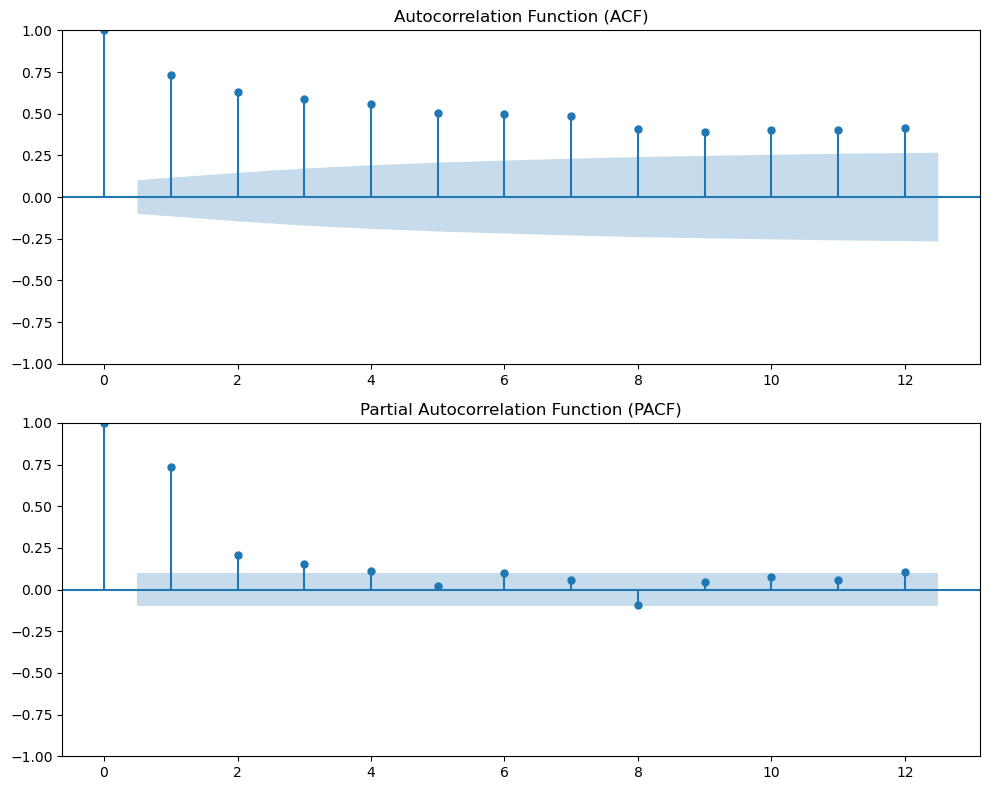

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Best AIC: 2892.4239444285145
Best BIC: 2904.212711858684
Best Parameters: (1, 1, 1)


In [8]:
# creating plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(dropped_df['NUM_1_Count'], ax=ax1, lags=12) # lag for 12 month data
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(dropped_df['NUM_1_Count'], ax=ax2, lags=12) # lag for 12 month data
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Use AIC and BIC to select model parameters
# Assuming ARIMA model with (p, d, q) parameters to be tuned

p_values = range(0, 3)  # Example range for AR parameter
d_values = range(0, 2)  # Example range for differencing parameter (d)
q_values = range(0, 3)  # Example range for MA parameter

best_aic = np.inf
best_bic = np.inf
best_params = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(dropped_df['NUM_1_Count'], order=(p, d, q))
                results = model.fit()

                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = (p, d, q)

                if results.bic < best_bic:
                    best_bic = results.bic

            except:
                continue

print(f'Best AIC: {best_aic}')
print(f'Best BIC: {best_bic}')
print(f'Best Parameters: {best_params}')

In [9]:
from sklearn.model_selection import train_test_split

X = dropped_df['CLEAN_DATE']  # Feature
y = dropped_df['NUM_1_Count']  # Target label

# Calculate the number of rows for training and testing
total_rows = len(dropped_df)
train_rows = int(total_rows * 0.85)
test_rows = total_rows - train_rows

# Split the data using iloc
X_train = X.iloc[:train_rows]
X_test = X.iloc[train_rows:]
y_train = y.iloc[:train_rows]
y_test = y.iloc[train_rows:]

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
5      2022-12-05
6      2022-12-06
7      2022-12-07
8      2022-12-08
9      2022-12-09
          ...    
320    2023-10-16
321    2023-10-17
322    2023-10-18
323    2023-10-19
324    2023-10-20
Name: CLEAN_DATE, Length: 320, dtype: object

X_test:
325    2023-10-21
326    2023-10-22
327    2023-10-23
328    2023-10-24
329    2023-10-25
330    2023-10-26
331    2023-10-27
332    2023-10-28
333    2023-10-29
334    2023-10-30
335    2023-10-31
336    2023-11-01
337    2023-11-02
338    2023-11-03
339    2023-11-04
340    2023-11-05
341    2023-11-06
342    2023-11-07
343    2023-11-08
344    2023-11-09
345    2023-11-10
346    2023-11-11
347    2023-11-12
348    2023-11-13
349    2023-11-14
350    2023-11-15
351    2023-11-16
352    2023-11-17
353    2023-11-18
354    2023-11-19
355    2023-11-20
356    2023-11-21
357    2023-11-22
358    2023-11-23
359    2023-11-24
360    2023-11-25
361    2023-11-26
362    2023-11-27
363    2023-11-28
364    2023-11-29
365    2023-11-30
3

In [10]:
# ARIMA Model

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using the above generated best param values here
p = 1  # AR parameter
d = 1  # Differencing parameter
q = 1  # MA parameter

# Fit ARIMA model using training data
model = ARIMA(y_train, order=(p, d, q), seasonal_order=(0,0,0,12)) # used the seasonal order numbers from the below auto ARIMA
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            NUM_1_Count   No. Observations:                  320
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1225.055
Date:                Fri, 15 Mar 2024   AIC                           2456.111
Time:                        19:10:25   BIC                           2467.407
Sample:                             0   HQIC                          2460.622
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3378      0.068      4.944      0.000       0.204       0.472
ma.L1         -0.8201      0.046    -17.965      0.000      -0.910      -0.731
sigma2       126.5780      6.069     20.855      0.0

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Make predictions on training data
y_train_pred = results.predict(dynamic=False)
print("Prediction on Training Data:", y_train_pred)

# Calculate and print Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print('\nEvaluation Metrics:')
print(f'Mean Absolute Error (MAE) on training data: {mae_train}')
print(f'Mean Squared Error (MSE) on training data: {mse_train}')
print(f'Root Mean Squared Error (RMSE) on training data: {rmse_train}')

# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f'Mean Absolute Percentage Error (MAPE) on training data: {mape_train}')

Prediction on Training Data: 5       0.000000
6      31.998406
7      34.063725
8      31.853003
9      27.004394
         ...    
320    24.604811
321    22.784965
322    19.537573
323    22.525166
324    24.163674
Name: predicted_mean, Length: 320, dtype: float64

Evaluation Metrics:
Mean Absolute Error (MAE) on training data: 8.208714332343897
Mean Squared Error (MSE) on training data: 129.42095241908163
Root Mean Squared Error (RMSE) on training data: 11.37633299526177
Mean Absolute Percentage Error (MAPE) on training data: 0.2046350949041542


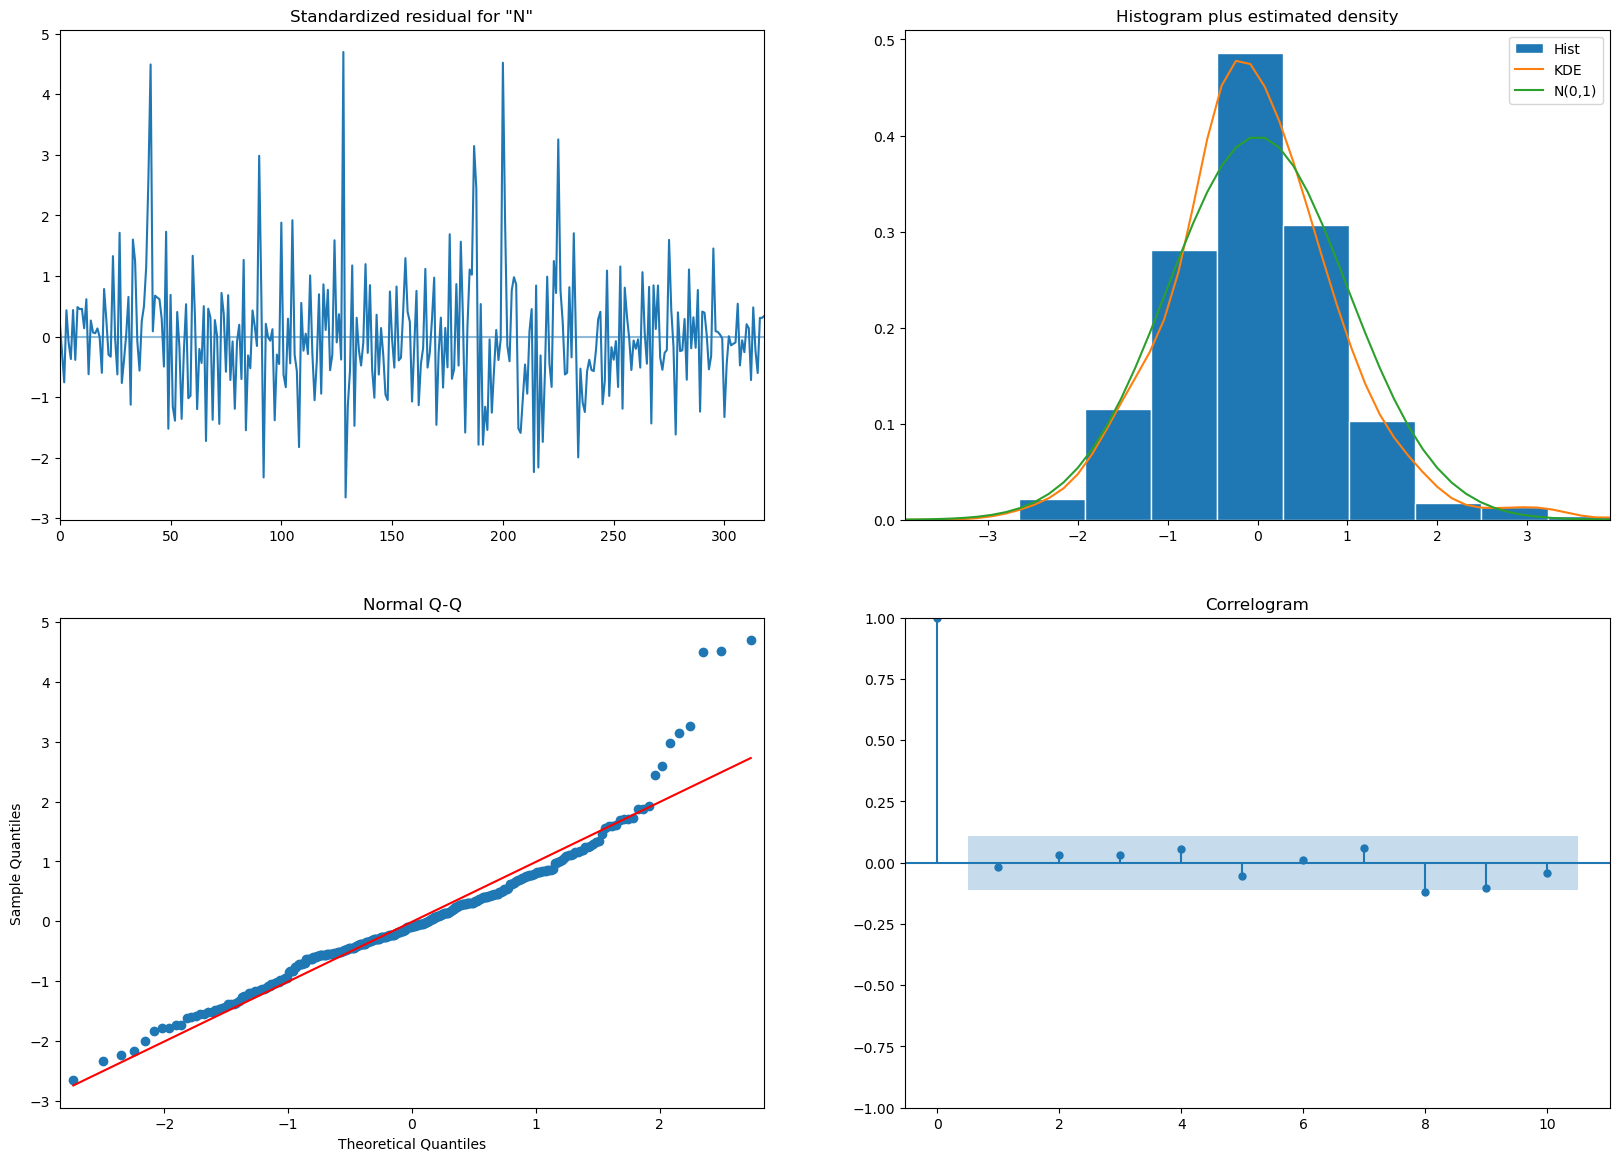

In [12]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [13]:
# Forecast future values
forecast_steps = 10  # Number of steps to forecast
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print(forecast)

320    25.529376
321    24.694728
322    24.412759
323    24.317502
324    24.285322
325    24.274450
326    24.270778
327    24.269537
328    24.269118
329    24.268976
Name: predicted_mean, dtype: float64


C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
y_train

5      32
6      35
7      31
8      23
9      32
       ..
320    22
321    16
322    23
323    26
324    28
Name: NUM_1_Count, Length: 320, dtype: int64

In [15]:
y_train_pred

5       0.000000
6      31.998406
7      34.063725
8      31.853003
9      27.004394
         ...    
320    24.604811
321    22.784965
322    19.537573
323    22.525166
324    24.163674
Name: predicted_mean, Length: 320, dtype: float64

In [16]:
# Auto ARIMA
from pmdarima import auto_arima

# Assuming y_train is a DataFrame column or a numpy array
y_train_series = y_train.squeeze()  # Convert to pandas Series if needed

# Use auto_arima to find the optimal parameters
model1 = auto_arima(y_train_series, seasonal=True, m=12)  # Assuming monthly seasonality (m=12)
print("Optimal ARIMA Model Parameters:")
print(model1.order)  # (p, d, q)
print(model1.seasonal_order)  # (P, D, Q, m)

Optimal ARIMA Model Parameters:
(1, 1, 2)
(0, 0, 0, 12)


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have obtained the optimal order and seasonal order
p, d, q = model1.order
P, D, Q, m = model1.seasonal_order

# Fit the ARIMA model with the optimal parameters
model_arima = ARIMA(y_train_series, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model_arima.fit()

# Make predictions on the test data
# Assuming X_test is your test data (if you have exogenous variables)
# If not, you can use the forecast method directly on the fitted model
# Replace X_test with your actual test data if applicable
forecast_values = model_fit.forecast(steps=len(X_test))

# Print or use forecast_values as needed
print("Forecasted Values:")
print(forecast_values)

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted Values:
320    26.056302
321    25.736582
322    25.504519
323    25.336079
324    25.213821
325    25.125081
326    25.060671
327    25.013920
328    24.979986
329    24.955356
330    24.937479
331    24.924503
332    24.915085
333    24.908249
334    24.903287
335    24.899685
336    24.897071
337    24.895174
338    24.893797
339    24.892797
340    24.892071
341    24.891545
342    24.891162
343    24.890885
344    24.890684
345    24.890537
346    24.890431
347    24.890354
348    24.890298
349    24.890258
350    24.890228
351    24.890207
352    24.890192
353    24.890180
354    24.890172
355    24.890166
356    24.890162
357    24.890159
358    24.890157
359    24.890155
360    24.890154
361    24.890153
362    24.890152
363    24.890152
364    24.890151
365    24.890151
366    24.890151
367    24.890151
368    24.890151
369    24.890151
370    24.890151
371    24.890151
372    24.890151
373    24.890151
374    24.890151
375    24.890151
376    24.890151
Name: predic

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
model_fit.predict()

5       0.000000
6      31.998109
7      33.898132
8      32.171806
9      27.312122
         ...    
320    24.272252
321    23.311585
322    20.073437
323    22.237459
324    24.368144
Name: predicted_mean, Length: 320, dtype: float64

In [19]:
y_train

5      32
6      35
7      31
8      23
9      32
       ..
320    22
321    16
322    23
323    26
324    28
Name: NUM_1_Count, Length: 320, dtype: int64

In [20]:
y_train_pred

5       0.000000
6      31.998406
7      34.063725
8      31.853003
9      27.004394
         ...    
320    24.604811
321    22.784965
322    19.537573
323    22.525166
324    24.163674
Name: predicted_mean, Length: 320, dtype: float64